<span style="font-weight: bold; font-size:40px; color:#2196F3">03-6</span>
# 데이터 저장하고 불러오기

지금까지 데이터를 추출하고 처리하는 방법에 대해 알아보았다. 일종의 '데이터 가공 처리'를 거친 것이다. 이렇게 잘 가공한 데이터는 안전하게 보관해야 다음에 또 사용할 수 있다. 판다스는 데이터를 저장하는 다양한 방법을 제공한다. 여기서는 가공한 데이터를 피클, CSV, TSV 파일로 저장하고 다시 불러오는 방법에 대해 살펴본다.

### 데이터를 피클, CSV, TSV 파일로 저장하고 불러오기
#### 1. 피클로 저장하기
피클은 데이터를 바이너리 형태로 직렬화한 오브젝트를 저장하는 방법이다. 피클로 저장하면 스프레드시트보다 더 작은 용량으로 데이터를 저장할 수 있어 매우 편리하다. 시리즈를 피클로 저장혀려면 to_pickle 메서드를 사용하면 되는데, 이때 저장 경로를 문자열로 전달해야 한다.

In [18]:
# 데이터 불러오기
import pandas as pd
scientists = pd.read_csv('doit_pandas_data/data/scientists.csv')

In [19]:
names = scientists['Name']
names.to_pickle('scientists_names_series.pickle')

2. 데이터프레임도 피클로 저장할 수 있다.

In [20]:
scientists.to_pickle('scientists_df.pickle')

3. 피클은 바이너리 형태의 오브젝트이기 때문에 저장된 피클 데이터를 편집기와 같은 프로그램으로 열어보면 이상한 문자가 나타난다. 피클 데이터는 반드시 read_pickle 메서드로 읽어 들여야 한다.

In [24]:
scientists_names_from_pickle = pd.read_pickle('scientists_names_series.pickle')
print(scientists_names_from_pickle)

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object


In [25]:
scientists_from_pickle = pd.read_pickle('scientists_df.pickle')
print(scientists_from_pickle)

                   Name        Born        Died  Age          Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
5             John Snow  1813-03-15  1858-06-16   45           Physician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician


#### 4. CSV 파일과 TSV 파일로 저장하기
CSV 파일은 데이터를 쉼표로 구분하여 저장한 파일이고 TSV 파일은 데이터를 탭으로 구분하여 저장한 파일이다. 실제로 각각의 파일을 텍스트 편집기로 열어 살펴보면 데이터가 쉼표, 탭으로 구분되어 있는 것을 알 수 있다. 다음은 data 폴더의 'concat_1.csv' 파일과 'gapmnder.tsv' 파일을 비주얼 스튜디오 코드라는 텍스트 편집기로 열어 살펴본 것이다. 비주얼 스튜디오 코드가 없다면 컴퓨터에 설치된 텍스트 편집기로 파일을 열어보자.

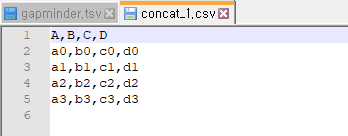

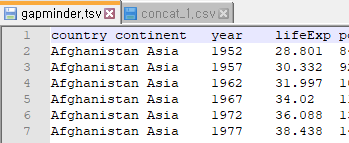

5. to_csv 메서드로 시리즈(names)와 데이터프레임(scientists)을 CSV 파일로 저장할 수 있다. 이때 sep 인자를 추가하여 '\t'를 지정하고 파일의 확장자를 '.tsv'로 지정하면 TSV 파일로 저장할 수 있다.

In [27]:
names.to_csv('scientist_names_series.csv')
scientists.to_csv('scientist_df.tsv', sep='\t')

### 시리즈와 데이터프레임을 엑셀 파일로 저장하기

시리즈는 엑셀 구조와 맞지 않기 때문에 엑셀 파일로 저장할 수 없다. 엑셀 파일로 저장할 수 있는 데이터프레임으로 변환해야 한다. 물론 데이터프레임은 엑셀 파일로 바로 저장할 수 있다. 단, xls 파일로 저장하려면 xlwt 라이브러리가 필요하고, xlsx 파일로 저장하려면 openpyxl 라이브러리가 필요하다. 다음 명령어를 아나콘다 프롬프트에 입력하여 xlwt 라이브러리와 openpyxl 라이브러리를 설치하자.

In [31]:
pip install xlwt

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


시리즈는 to_frame이라는 메서드를 사용해 데이터프레임으로 변환한 다음 엑셀 파일로 저장해야 한다. 다음은 시리즈를 데이터프레임으로 변환한 다음 엑셀 파일(확장자 xls, xlsx)로 저장한 것이다.

In [40]:
names_df = names.to_frame()

import xlwt
names_df.to_excel('scientists_names_series_df.xls') #xlwt 패키지는 곧 종료 된다고 하니 openpyxl 패키지만 사용하자.

/tmp/ipykernel_2753/3629254575.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  names_df.to_excel('scientists_names_series_df.xls')


In [41]:
import openpyxl
names_df.to_excel('scientists_names_series_df.xlsx')

<span style="font-weight: bold; font-size:20px; color:#2196F3">마무리하며</span>

이 장에서는 시리즈와 데이터프레임을 좀 더 자세히 다루어 보았다. 다음 장부터는 파이썬과 판다스로 그래프를 그리기 위한 기초 개념을 살펴보았다. 데이터 분석에서 가장 중요한 요소 중 하나인 데이터 시각화에 대한 내용이 시작되는 것이다. 만약 02, 03장을 완벽하게 이해하지 못했다면 다시 공부하고 04장을 시작하자.



<span style="font-weight: bold; font-size:20px; color:Gray">출처 : Do it! 데이터 분석을 위한 판다스</span>